# Análisis Exploratorio de la Capa Silver

## Configuración inicial

Importamos las librerías:

In [2]:
import pyarrow.parquet as pq
import pandas as pd

## Now Playing

Cargamos la Tabla Delta Silver de Now Playing e imprimimos el schema para corroborar que los tipos de datos almacenados son correctos luego de la transformación:

In [3]:
table_np = pq.read_table('../data/delta/silver/tmdb/now_playing')
print(table_np.schema)

movie_id: int64
title: string
vote_average: double
vote_count: int32
popularity: double
rating_category: dictionary<values=string, indices=int32, ordered=0>
date: dictionary<values=string, indices=int32, ordered=0>


Hacemos una inspección de la estructura pasando el contenido de la tabla a un DataFrame:

In [4]:
df_np = table_np.to_pandas()
df_np.head()

,movie_id,title,vote_average,vote_count,popularity,rating_category,date
0,1125899,Cleaner,6.750,142,417.3003,Buena,2025-04-03
1,1229730,Carjackers,7.100,37,435.5444,Buena,2025-04-03
2,822119,Captain America: Brave New World,6.118,1187,348.3977,Regular,2025-04-03
3,1261050,The Quiet Ones,6.200,15,363.2694,Regular,2025-04-03
4,1197306,A Working Man,6.968,94,356.5597,Buena,2025-04-03


In [5]:
df_np.tail()

,movie_id,title,vote_average,vote_count,popularity,rating_category,date
94,1216780,Nadaaniyan,5.900,30,15.8515,Mala,2025-04-03
95,128,Princess Mononoke,8.332,8249,16.3969,Excelente,2025-04-03
96,765897,The Unbreakable Boy,7.100,25,14.7968,Buena,2025-04-03
97,1261555,Promised Hearts,5.500,3,27.5698,Mala,2025-04-03
98,1100099,We Live in Time,7.400,763,14.8867,Excelente,2025-04-03


Efectuamos un gráfico ilustrativo de la columna de enriquecimiento `rating_category`:

<Axes: >

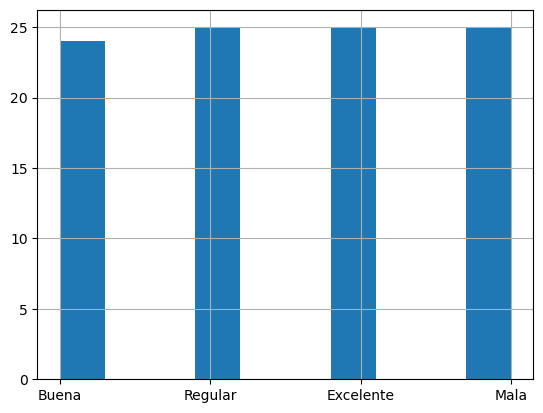

In [6]:
df_np['rating_category'].hist()

## Movie Details

Cargamos la Tabla Delta Silver de Movie Details e imprimimos el schema para corroborar que los tipos de datos almacenados son correctos luego de la transformación:

In [7]:
table_mv = pq.read_table('../data/delta/silver/tmdb/movie_details')
print(table_mv.schema)

movie_id: int64
title: string
runtime: int32
budget: int64
imdb_id: string
homepage: string
original_language: string
release_date: timestamp[us]
genre_ids: list<item: int64>
  child 0, item: int64
origin_countries: string
available_on_platform: bool


Hacemos una inspección de la estructura pasando el contenido de la tabla a un DataFrame:

In [8]:
df_mv = table_mv.to_pandas()
df_mv.head()

,movie_id,title,runtime,budget,imdb_id,homepage,original_language,release_date,genre_ids,origin_countries,available_on_platform
0,1333100,Attack on Titan: THE LAST ATTACK,145,0,tt33175825,unknown,ja,2024-11-08,"[16, 28, 12, 14]",['JP'],False
1,696506,Mickey 17,137,118000000,tt12299608,https://www.mickey17movie.com,en,2025-02-28,"[878, 35, 12]",['GB' 'US'],False
2,717196,Niko: Beyond the Northern Lights,85,0,tt14813816,unknown,fi,2024-10-07,"[16, 10751, 14]",['IE' 'DE' 'DK' 'FI'],False
3,1249289,Alarum,95,20000000,tt31456973,https://justwatch.pro/movie/1249289/alarum,en,2025-01-16,"[28, 80, 53]",['US'],False
4,128,Princess Mononoke,134,23500000,tt0119698,http://www.princess-mononoke.com/,ja,1997-07-12,"[12, 14, 16]",['JP'],False


Efectuamos un gráfico ilustrativo de la columna de enriquecimiento `available_on_platform`:

<Axes: xlabel='available_on_platform'>

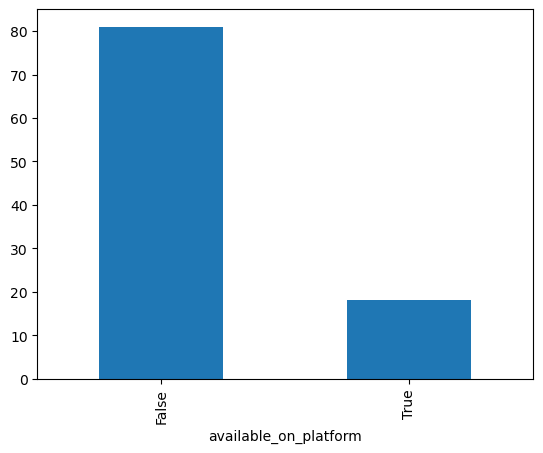

In [9]:
df_mv['available_on_platform'].value_counts().plot(kind='bar')

## Tabla de Dimensiones

In [10]:
# Carga de Tabla de Dimensiones

dim_countries = pq.read_table('../data/delta/silver/tmdb/dim_countries')
dim_genres = pq.read_table('../data/delta/silver/tmdb/dim_genres')
dim_languages = pq.read_table('../data/delta/silver/tmdb/dim_languages')

# Convertimos a Pandas

df_countries = dim_countries.to_pandas()
df_genres = dim_genres.to_pandas()
df_lang = dim_languages.to_pandas()

Obervamos los primeros registros a los fines de asegurarnos el correcto almacenamiento de la información para futuros enriquecimientos de tablas:

In [11]:
df_countries.head()

,movie_id,origin_countries,country_common
0,1333100,JP,Japan
1,696506,GB,United Kingdom
2,696506,US,United States of America
3,717196,IE,Ireland
4,717196,DE,Germany


In [12]:
df_genres.head()

,genre_id,genre_name
0,16,Animation
1,28,Action
2,12,Adventure
3,14,Fantasy
4,878,Science Fiction


In [13]:
df_lang.head()

,movie_id,original_language,Language
0,1333100,ja,Japanese
1,696506,en,English
2,717196,fi,Finnish
3,1249289,en,English
4,128,ja,Japanese
